/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted per capita income in 2020: $41288.69


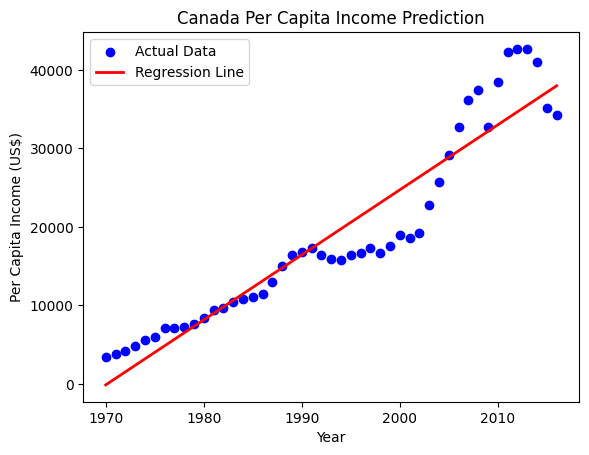

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load dataset
file_path = "canada_per_capita_income.csv"
data = pd.read_csv(file_path)

# Check for missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Define independent (X) and dependent (y) variables
X = data[['year']]
y = data['per capita income (US$)']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict per capita income for 2020
year_2020 = np.array([[2020]])
income_2020 = model.predict(year_2020)

print(f"Predicted per capita income in 2020: ${income_2020[0]:.2f}")

# Plot regression line
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted salary for 12 years of experience: $139980.89


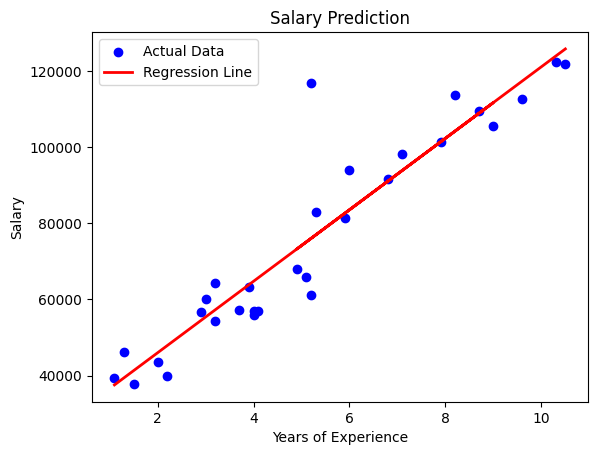

In [12]:
# Load dataset
file_path = "salary.csv"
data = pd.read_csv(file_path)

# Check for missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Define independent (X) and dependent (y) variables
X = data[['YearsExperience']]
y = data['Salary']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict salary for 12 years of experience
experience = np.array([[12]])
predicted_salary = model.predict(experience)

print(f"Predicted salary for 12 years of experience: ${predicted_salary[0]:.2f}")

# Plot regression line
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = "hiring.csv"
data = pd.read_csv("/content/hiring (1).csv");

# Convert 'experience' column to numerical values
def convert_to_int(value):
    word_to_num = {
        'one': 1,
        'two': 2,
        'three': 3,
        'four': 4,
        'five': 5,
        'six': 6,
        'seven': 7,
        'eight': 8,
        'nine': 9,
        'ten': 10,
        'eleven': 11,
        'twelve': 12,
        'zero': 0,
    }
    if pd.isnull(value):  # Check if value is NaN
        return value  # Return NaN as is
    try:
        # Attempt to convert to integer directly
        return int(value)
    except ValueError:
        # If not an integer, try converting from word to number
        return word_to_num.get(str(value).lower(), value)  # Handle cases like 'five'

data['experience'] = data['experience'].apply(convert_to_int)

# Fill missing values with mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Independent variables (X) and dependent variable (y)
X = data.iloc[:, :-1]  # All columns except the last one (Salary)
y = data.iloc[:, -1]   # Salary column

# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict salaries for candidates
candidates = np.array([[2, 9, 6], [12, 10, 10]])  # Experience, Test Score, Interview Score
predicted_salaries = model.predict(candidates)

print(f"Predicted salary for (2 yrs exp, 9 test score, 6 interview score): ${predicted_salaries[0]:.2f}")
print(f"Predicted salary for (12 yrs exp, 10 test score, 10 interview score): ${predicted_salaries[1]:.2f}")

Predicted salary for (2 yrs exp, 9 test score, 6 interview score): $47738.89
Predicted salary for (12 yrs exp, 10 test score, 10 interview score): $86424.67


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "1000_Companies.csv"
data = pd.read_csv("/content/1000_Companies.csv");

# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Encode categorical variable (State column)
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])

# Independent variables (X) and dependent variable (y)
X = data.iloc[:, :-1]  # All columns except the last one (Profit)
y = data.iloc[:, -1]   # Profit column

# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict profit for given input
test_data = np.array([[91694.48, 15841.3, 11931.24, label_encoder.transform(['Florida'])[0]]])  # Input data
predicted_profit = model.predict(test_data)

print(f"Predicted profit: ${predicted_profit[0]:.2f}")


Predicted profit: $-2153.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "homeprices_Multiple_LR.csv"  # Update with your actual file path
data = pd.read_csv("/content/homeprices_Multiple_LR (1).csv");

# Handle missing values (fill missing bedrooms with the median value)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)

# Define independent variables (X) and dependent variable (y)
X = data[['area', 'bedrooms', 'age']]
y = data['price']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Predict price for a new house (Example: area=3000, bedrooms=3, age=10)
new_house = np.array([[3000, 3, 10]])
predicted_price = model.predict(new_house)

print(f"Predicted Price for a house with 3000 sq ft, 3 bedrooms, 10 years old: ${predicted_price[0]:.2f}")


Model Coefficients: [  115.67164179 38432.8358209  -1902.98507463]
Model Intercept: 120373.13432834996
R² Score: -29.46
Mean Absolute Error (MAE): $39608.21
Root Mean Squared Error (RMSE): $41395.86
Predicted Price for a house with 3000 sq ft, 3 bedrooms, 10 years old: $563656.72


<ipython-input-18-784690fdd632>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


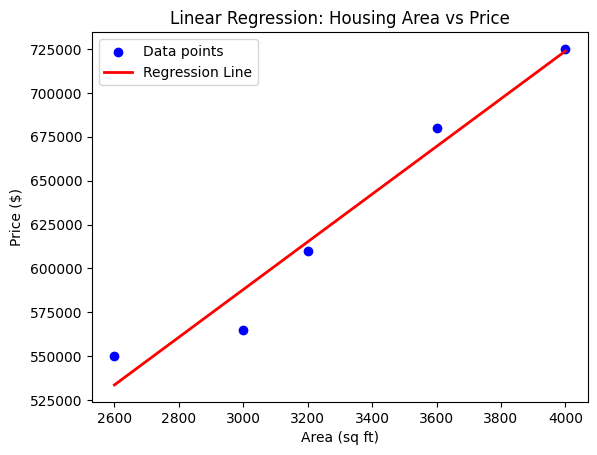

Model Equation: Price = 135.79 * Area + 180616.44
Predicted Price for 3000 sq ft: $587979.45


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "housing_area_price.csv"  # Update with your file path if needed
data = pd.read_csv("/content/housing_area_price (2).csv");

# Prepare the data
X = data[['area']].values  # Independent variable (reshaped for sklearn)
y = data['price'].values   # Dependent variable

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Linear Regression: Housing Area vs Price')
plt.legend()
plt.show()

# Display model coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f"Model Equation: Price = {slope:.2f} * Area + {intercept:.2f}")

# Predict price for a new house with 3000 sq ft area
new_area = np.array([[3000]])
predicted_price = model.predict(new_area)
print(f"Predicted Price for 3000 sq ft: ${predicted_price[0]:.2f}")
